In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

In [8]:
df = pd.read_csv("/SAS.csv")

In [9]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [11]:
null_values = df.isnull().sum()

print("Null values in the entire Data:")
print(null_values)

Null values in the entire Data:
product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
null_values = df.isnull().sum()
null_values

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
import string

df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [16]:
df['Review']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205045           terrific
205046     classy product
205049               nice
205050           just wow
205051      valueformoney
Name: Review, Length: 154467, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your Data containing text data
text_data = df['Review']
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()

In [18]:
feature_names

array(['10', '100', '1010', ..., 'yr', 'zero', 'zip'], dtype=object)

In [19]:
import sklearn.feature_extraction.text as text

count_vectorizer = text.CountVectorizer()

In [20]:
count_vectorizer.fit(df.Review)

CountVectorizer()

In [21]:
data_features = count_vectorizer.transform(df.Review)

In [22]:
density = (data_features.getnnz() * 100) / (data_features.shape[0] * data_features.shape[1])
print("Density of the matrix: ", density)

Density of the matrix:  0.14335845807451578


In [23]:
feature_counts = df['Review'].value_counts()
feature_counts

wonderful                                         7623
not specified                                     5714
great product                                     4816
brilliant                                         4807
awesome                                           4797
                                                  ... 
no 1 worst product                                   1
50  50                                               1
really bad product worst service from flipkart       1
nice mixer  nice price                               1
product looking very nice  strong quality            1
Name: Review, Length: 1263, dtype: int64

In [24]:
features = vectorizer.get_feature_names_out()  # Replace with the variable that holds feature names
features_counts = np.sum(data_features.toarray(), axis=0)
features_counts_df = pd.DataFrame({'features': features, 'counts': features_counts})

In [25]:
count_of_single_occurrences = len(features_counts_df[features_counts_df['counts'] == 1])
count_of_single_occurrences

763

In [26]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit_transform(df['Review'])
features = count_vectorizer.get_feature_names_out()
data_features = feature_vector.toarray()
features_counts = np.sum(data_features, axis=0)
feature_counts = pd.DataFrame({'features': features, 'counts': features_counts})

In [27]:
top_features_counts = feature_counts.sort_values('counts', ascending=False).head(15)

In [28]:
top_features_counts

,features,counts
930,product,25782
521,good,14842
1172,the,9591
115,awesome,9558
943,purchase,9310
1166,terrific,9260
819,not,8867
810,nice,7915
1304,worth,7651
1293,wonderful,7638


In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
df['Review'][0:10]

0                 super
1               awesome
2                  fair
3       useless product
4                  fair
5               awesome
6    highly recommended
7                  nice
8        unsatisfactory
9       worth the money
Name: Review, dtype: object

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


model = SVC()
model.fit(X_train_vectorized, y_train)


y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.9011458535637988
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



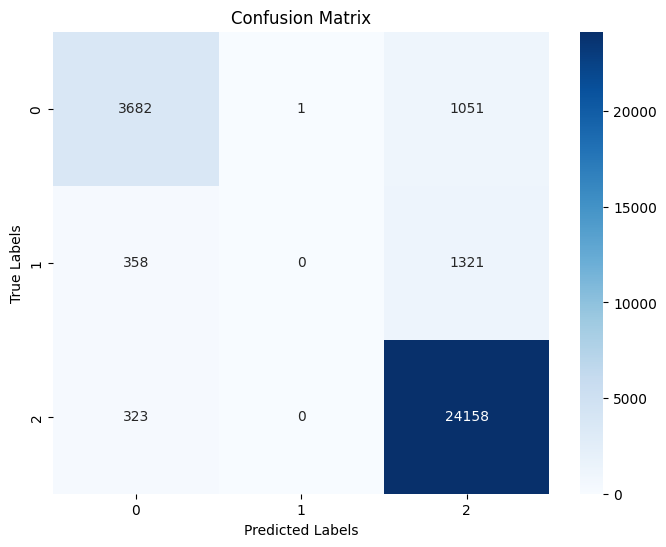

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)


y_pred = model.predict(X_test_vectorized)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.9011782223085388
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



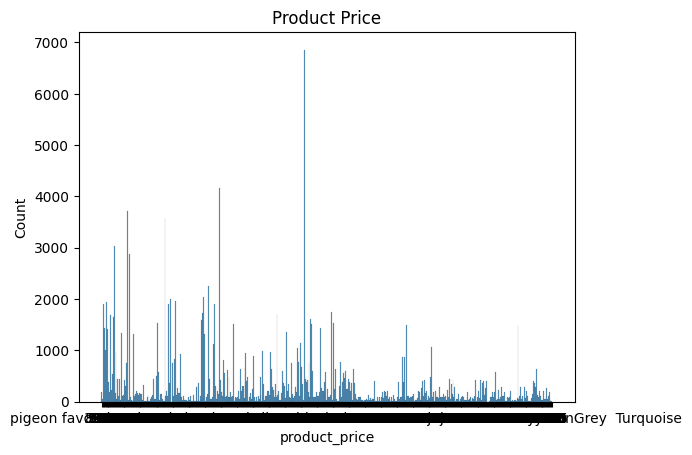

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['product_price'])
plt.title('Product Price')
plt.show()

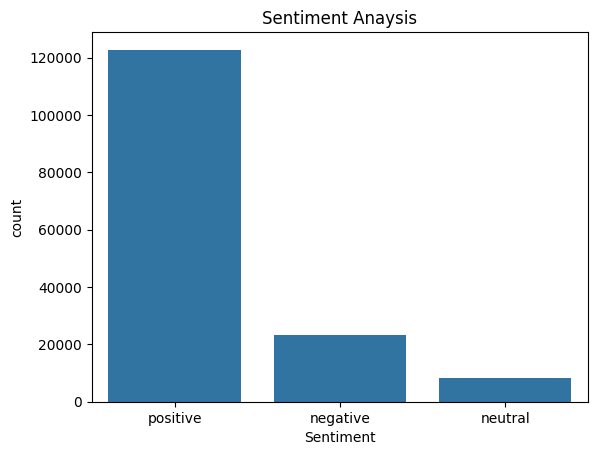

In [35]:

sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Anaysis')
plt.show()

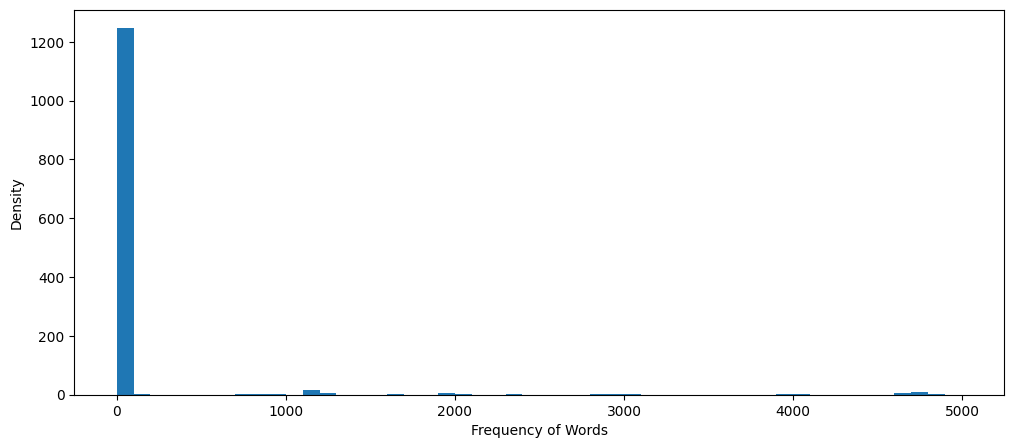

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.hist(features_counts_df['counts'], bins=50, range=(0, 5000))
plt.xlabel('Frequency of Words')
plt.ylabel('Density')
plt.show()